In [ ]:
import matplotlib.pyplot as plt
import random,math
import numpy as np
import copy 

In [ ]:
def diamondSquare(size,scale,smoothness):

  heightmapWidth = (2**size)+1
  # if not (math.sqrt(heightmapWidth).is_integer() and heightmapWidth % 2 == 1) :
  #   return False
  # initialize the heightmap to 0's

  heightmap = [[0]*heightmapWidth for i in range(heightmapWidth)]

  # set the corner points to the same random value
  # rand = random.random()*scale
  heightmap[0][0] = random.random()*scale
  heightmap[heightmapWidth - 1][0] = random.random()*scale
  heightmap[0][heightmapWidth - 1] = random.random()*scale
  heightmap[heightmapWidth - 1][heightmapWidth - 1] = random.random()*scale

  # origin = copy.deepcopy(heightmap)
  # set the randomness bounds, higher values mean rougher landscapes
  randomness = smoothness
  tileWidth = heightmapWidth - 1
  curt=0
  # we make a pass over the heightmap
  # each time we decrease the side length by 2
  while tileWidth > 1:
      halfSide = tileWidth // 2
      # print('itr'+str(curt)+' '+str(halfSide),end=' ' )

      # set the diamond values (the centers of each tile)
      for x in range(0, heightmapWidth - 1, tileWidth):
          for y in range(0, heightmapWidth - 1, tileWidth):
              cornerSum = heightmap[x][y] + \
                          heightmap[x + tileWidth][y] + \
                          heightmap[x][y + tileWidth] + \
                          heightmap[x + tileWidth][y + tileWidth]

              avg = cornerSum / 4
              avg += random.random()*randomness

              heightmap[x + halfSide][y + halfSide] = avg

      # set the square values (the midpoints of the sides)
      for x in range(0, heightmapWidth - 1, halfSide):
          for y in range((x + halfSide) % tileWidth, heightmapWidth - 1, tileWidth):
              avg = heightmap[(x - halfSide + heightmapWidth - 1) % (heightmapWidth - 1)][y] + \
                    heightmap[(x + halfSide) % (heightmapWidth - 1)][y] + \
                    heightmap[x][(y + halfSide) % (heightmapWidth - 1)] + \
                    heightmap[x][(y - halfSide + heightmapWidth - 1) % (heightmapWidth - 1)]

              avg /= 4.0
              avg += random.random()* randomness

              heightmap[x][y] = avg

              # because the values wrap round, the left and right edges are equal, same with top and bottom
              if x == 0:
                  heightmap[heightmapWidth - 1][y] = avg
              if y == 0:
                  heightmap[x][heightmapWidth - 1] = avg

      # reduce the randomness in each pass, making sure it never gets to 0
      randomness = max(randomness // 2, 1)
      tileWidth //= 2
      # curt+=1
  plt.imshow(heightmap,cmap="gray")
  plt.show()

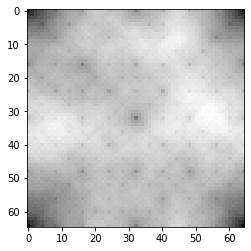

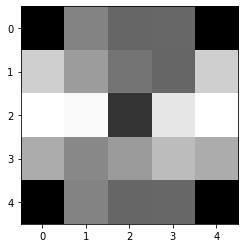

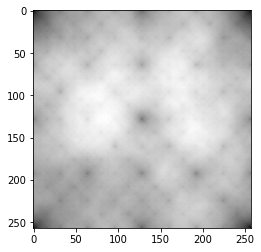

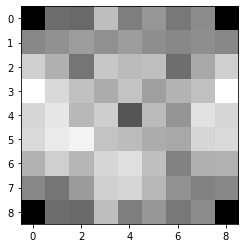

In [ ]:
diamondSquare(6,256,128)
diamondSquare(2,256,128)
diamondSquare(8,256,64)
diamondSquare(3,10,128)
